In [7]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data = pd.read_csv("../yolov3/data/traffic_sign_data/traffic_sign_recog_final.csv")

In [8]:
classes_to_take = ["pedestrianCrossing", "stop", "signalAhead","yield", "addedLane", "school","speedLimit35","laneEnds",
 "speedLimit25","turnRight", "speedLimit45","speedLimit30","speedLimitUrdbl","noLeftTurn",
 "schoolSpeedLimit25"]

data = data[data["class_name"].isin( classes_to_take)]

In [9]:
data["class_name"].value_counts()

pedestrianCrossing    6276
stop                  1914
signalAhead            999
yield                  676
addedLane              667
school                 637
speedLimit35           538
laneEnds               483
speedLimit25           349
turnRight              205
speedLimit45           141
speedLimit30           140
speedLimitUrdbl        132
noLeftTurn             108
schoolSpeedLimit25     105
Name: class_name, dtype: int64

In [10]:
import shutil

In [11]:
# shutil.rmtree("data/traffic_sign_data/LISA/labels/")
# os.mkdir("data/traffic_sign_data/LISA/labels")

In [12]:
# os.mkdir("RTSD")
# os.mkdir("LISA")
# os.mkdir("RTSD/labels")
# os.mkdir("LISA/labels")
# os.mkdir("RTSD/images")
# os.mkdir("LISA/images")

In [13]:
f_names = data['filename'].unique()

data["class_ids"] = le.fit_transform(data["class_name"].values)

unq_class_ids = data[["class_ids", "class_name"]].drop_duplicates().sort_values("class_ids")
unq_class_ids.index = range(unq_class_ids.shape[0])

In [14]:
class_dict = {}
for r in unq_class_ids.iterrows():
    class_dict[r[1]["class_ids"]] = r[1]["class_name"]
class_dict

{0: 'addedLane',
 1: 'laneEnds',
 2: 'noLeftTurn',
 3: 'pedestrianCrossing',
 4: 'school',
 5: 'schoolSpeedLimit25',
 6: 'signalAhead',
 7: 'speedLimit25',
 8: 'speedLimit30',
 9: 'speedLimit35',
 10: 'speedLimit45',
 11: 'speedLimitUrdbl',
 12: 'stop',
 13: 'turnRight',
 14: 'yield'}

In [15]:
unq_class_ids["class_name"].values

array(['addedLane', 'laneEnds', 'noLeftTurn', 'pedestrianCrossing',
       'school', 'schoolSpeedLimit25', 'signalAhead', 'speedLimit25',
       'speedLimit30', 'speedLimit35', 'speedLimit45', 'speedLimitUrdbl',
       'stop', 'turnRight', 'yield'], dtype=object)

In [17]:
for f in f_names:
    data_f = data[data["filename"] == f]
    write_to_file = []
    for r in data_f.iterrows():
        label_idx = r[1]["class_ids"]
        xmin = r[1]["xmin"]
        xmax = r[1]["xmax"]
        ymin = r[1]["ymin"]
        ymax = r[1]["ymax"]
        img_height = r[1]["height"]
        img_width = r[1]["width"]
        x_center = (xmin + xmax)/2
        x_center = x_center/img_width
        y_center = (ymin + ymax)/2
        y_center = y_center/img_height
        height = ymax - ymin
        height = height/img_height
        width = xmax - xmin
        width = width/img_width
        str_to_append = str(label_idx)+ " " + str(x_center) + " " + str(y_center) + " " + str(width) + " " + str(height) 
        write_to_file.append(str_to_append)
#     if r[1]["dataset"] == "lisa":
#         with open("data/traffic_sign_data/LISA/labels/"+r[1]["filename"].replace(".png", ".txt"), "w") as f:
#             f.write("\n".join(write_to_file))
#         f.close()
#     elif r[1]["dataset"] == "rtsd":
#         with open("data/traffic_sign_data/RTSD/labels/"+r[1]["filename"].replace(".jpg", ".txt"), "w") as f:
#             f.write("\n".join(write_to_file))
#         f.close()

In [5]:
txt_fls = glob.glob("../yolov3/data/traffic_sign_data/RTSD/labels/*.txt")

4 0.5458333333333333 0.5319444444444444 0.0125 0.017592592592592594


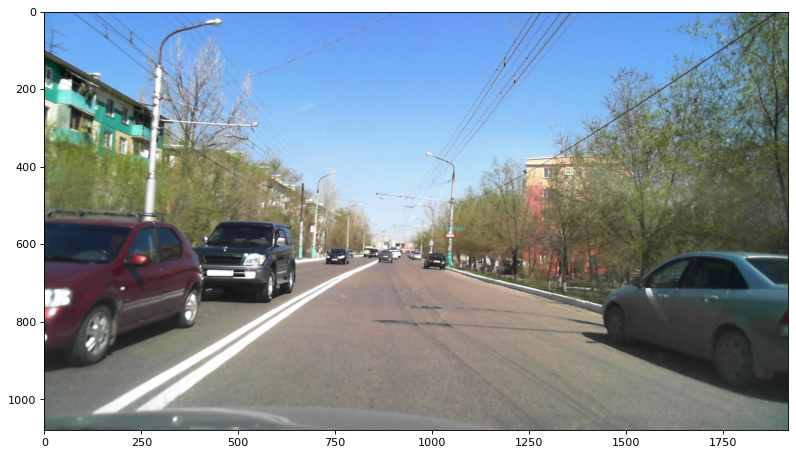

In [56]:
txt_fl = np.random.choice(txt_fls, 1)[0]
img_fl = txt_fl.replace(".txt", ".jpg").replace("labels", "images")
with open(txt_fl) as f:
    label = f.read()

print(label)

label_ls = [[float(a) for a in f.split(" ")] for f in label.split("\n")]

import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=80)

img  = cv2.imread(img_fl)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX
h, w, _ = img.shape
for l in label_ls:
    x_center = int(l[1]*w)
    y_center = int(l[2]*h)
    width = int(l[3]*w)
    height = int(l[4]*h)
    pt1 = np.array([int(x_center - width/2), int(y_center - height/2)], dtype = np.int32)
    pt2 = np.array([int(x_center + width/2), int(y_center + height/2)], dtype = np.int32)
    
    cv2.rectangle(img, tuple(pt1), tuple(pt2), (255, 0, 0), 1)
    cv2.putText(img,class_dict[int(l[0])], tuple(pt1), font, .5,(0,255,255),1)

plt.imshow(img)

## Training val dist LISA 

In [17]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
from sklearn.model_selection import train_test_split

data = pd.read_csv("data/traffic_sign_data/traffic_sign_recog_final.csv")

In [18]:
classes_to_take = ["pedestrianCrossing", "stop", "signalAhead","yield", "addedLane", "school","speedLimit35","laneEnds",
 "speedLimit25","turnRight", "speedLimit45","speedLimit30","speedLimitUrdbl","noLeftTurn",
 "schoolSpeedLimit25"]

data = data[data["class_name"].isin( classes_to_take)]

In [19]:
f_names = data['filename'].unique()

data["class_ids"] = le.fit_transform(data["class_name"].values)

unq_class_ids = data[["class_ids", "class_name"]].drop_duplicates().sort_values("class_ids")
unq_class_ids.index = range(unq_class_ids.shape[0])

In [20]:
data_lisa = data[data["dataset"] == "lisa"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_lisa, data_lisa[["class_ids"]], test_size = .15, stratify=data_lisa[["class_ids"]])

In [43]:
X_train["class_ids"].value_counts()

12    1548
3      922
6      786
9      457
7      297
0      250
14     201
1      178
10     120
8      119
4      113
11     112
5       89
13      78
2       40
Name: class_ids, dtype: int64

In [42]:
X_test["class_ids"].value_counts()

12    273
3     163
6     139
9      81
7      52
0      44
14     35
1      32
10     21
8      21
11     20
4      20
5      16
13     14
2       7
Name: class_ids, dtype: int64

In [24]:
train_names = ["data/traffic_sign_data/LISA/images/" +f for f in X_train["filename"].unique()]

In [25]:
len(train_names)/4

1142.5

In [26]:
val_names = ["data/traffic_sign_data/LISA/images/"+f for f in X_test["filename"].unique()]

In [27]:
len(val_names)/4

229.5

In [28]:
with open("data/traffic_sign_data/train_lisa.txt", 'w') as f:
    f.write("\n".join(train_names))

In [29]:
with open("data/traffic_sign_data/valid_lisa.txt", 'w') as f:
    f.write("\n".join(val_names))

In [1]:
import numpy as np

## Train val RTSD 

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
from sklearn.model_selection import train_test_split

data = pd.read_csv("../yolov3/data/traffic_sign_data/traffic_sign_recog_final.csv")

In [2]:
classes_to_take = ["pedestrianCrossing", "stop", "signalAhead","yield", "addedLane", "school","speedLimit35","laneEnds",
 "speedLimit25","turnRight", "speedLimit45","speedLimit30","speedLimitUrdbl","noLeftTurn",
 "schoolSpeedLimit25"]

data = data[data["class_name"].isin( classes_to_take)]

In [3]:
f_names = data['filename'].unique()

data["class_ids"] = le.fit_transform(data["class_name"].values)

unq_class_ids = data[["class_ids", "class_name"]].drop_duplicates().sort_values("class_ids")
unq_class_ids.index = range(unq_class_ids.shape[0])

In [4]:
data_rtsd = data[data["dataset"] == "rtsd"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data_rtsd, data_rtsd[["class_ids"]], test_size = .15, stratify=data_rtsd[["class_ids"]])

In [76]:
train_names = ["../yolov3/data/traffic_sign_data/RTSD/images/" +f for f in X_train["filename"].unique()]
train_names = [f.replace("../yolov3/","") for f in train_names]

In [77]:
len(train_names)/4

996.5

In [79]:
val_names = ["../yolov3/data/traffic_sign_data/RTSD/images/"+f for f in X_test["filename"].unique()]
val_names = [f.replace("../yolov3/","") for f in val_names]

In [80]:
len(val_names)/4

248.25

In [81]:
with open("../yolov3/data/traffic_sign_data/train_rtsd.txt", 'w') as f:
    f.write("\n".join(train_names))

In [82]:
with open("../yolov3/data/traffic_sign_data/valid_rtsd.txt", 'w') as f:
    f.write("\n".join(val_names))

## Making data for incremental training 

In [3]:
train_lisa = np.loadtxt("../yolov3/data/traffic_sign_data/train_lisa.txt", dtype=str)
valid_lisa = np.loadtxt("../yolov3/data/traffic_sign_data/valid_lisa.txt", dtype=str)
train_rtsd = np.loadtxt("../yolov3/data/traffic_sign_data/train_rtsd.txt", dtype=str)
valid_rtsd = np.loadtxt("../yolov3/data/traffic_sign_data/valid_rtsd.txt", dtype=str)

## Breaking LISA data into partitions

In [97]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
from sklearn.model_selection import train_test_split

data = pd.read_csv("../yolov3/data/traffic_sign_data/traffic_sign_recog_final.csv")

classes_to_take = ["pedestrianCrossing", "stop", "signalAhead","yield", "addedLane", "school","speedLimit35","laneEnds",
 "speedLimit25","turnRight", "speedLimit45","speedLimit30","speedLimitUrdbl","noLeftTurn",
 "schoolSpeedLimit25"]

data = data[data["class_name"].isin( classes_to_take)]

f_names = data['filename'].unique()

data["class_ids"] = le.fit_transform(data["class_name"].values)

unq_class_ids = data[["class_ids", "class_name"]].drop_duplicates().sort_values("class_ids")
unq_class_ids.index = range(unq_class_ids.shape[0])

data_lisa = data[data["dataset"] == "lisa"]

In [101]:
len(train_lisa)

4570

In [102]:
n_examples = [f for f in range(0, 4570, 100)]

In [103]:
n_examples = ["num_examples_"+str(f) for f in n_examples[1:]]

In [120]:
ls = [1,2,3,4,5]

In [122]:
ls[3:]

[4, 5]

In [124]:
for partition in n_examples:
    num_ex = int(partition.split("_")[-1])
    _, X_test, _, y_test = train_test_split(data_lisa, data_lisa[["class_ids"]], test_size = num_ex, stratify=data_lisa[["class_ids"]])
    
    val_names = ["../yolov3/data/traffic_sign_data/LISA/images/"+f for f in X_test["filename"].unique()]
    val_names = [f.replace("../yolov3/","") for f in val_names]
    val_names = list(set(val_names) - set(valid_lisa))
    print(len(val_names))
    if os.path.exists("../yolov3/data/traffic_sign_data/LISA_partitions/"+partition):
        pass
    else:
        os.mkdir("../yolov3/data/traffic_sign_data/LISA_partitions/"+partition)
    with open("../yolov3/data/traffic_sign_data/LISA_partitions/" + partition + "/train_lisa.txt", 'w') as f:
        f.write("\n".join(val_names))
    
    shutil.copyfile("../yolov3/data/traffic_sign_data/valid_lisa.txt", "../yolov3/data/traffic_sign_data/LISA_partitions/"+partition+"/valid_lisa.txt")
    shutil.copyfile("../yolov3/data/traffic_sign_data/valid_rtsd.txt", "../yolov3/data/traffic_sign_data/LISA_partitions/"+partition+"/valid_rtsd.txt")
    str_ls_write = ["classes= 15", "train=data/traffic_sign_data/LISA_partitions/" + partition + "/train_lisa.txt",
    "valid1=data/traffic_sign_data/LISA_partitions/"+partition+"/valid_lisa.txt", 
    "valid2=data/traffic_sign_data/LISA_partitions/"+partition+"/valid_rtsd.txt", "names=data/traffic_sign_data/classes.names"]
    with open("../yolov3/data/custom_lisa"+str(num_ex)+".data", 'w') as f:
        f.write("\n".join(str_ls_write))

80
160
231
315
410
483
565
634
721
771
865
959
1031
1088
1197
1227
1308
1397
1464
1540
1611
1662
1803
1808
1891
1980
2031
2141
2173
2235
2325
2379
2487
2535
2619
2655
2759
2834
2863


In [112]:
valid_lisa

array(['data/traffic_sign_data/LISA/images/pedestrian_1323896929.avi_image21.png',
       'data/traffic_sign_data/LISA/images/stop_1333397469.avi_image16.png',
       'data/traffic_sign_data/LISA/images/pedestrianCrossing_1333395992.avi_image3.png',
       'data/traffic_sign_data/LISA/images/speedLimit_1323896613.avi_image24.png',
       'data/traffic_sign_data/LISA/images/laneEnds_1331866559.avi_image13.png',
       'data/traffic_sign_data/LISA/images/pedestrian_1323822830.avi_image11.png',
       'data/traffic_sign_data/LISA/images/speedLimit35_1333395252.avi_image4.png',
       'data/traffic_sign_data/LISA/images/stop_1323822759.avi_image17.png',
       'data/traffic_sign_data/LISA/images/yield_1323821570.avi_image1.png',
       'data/traffic_sign_data/LISA/images/speedLimit_1331866076.avi_image2.png',
       'data/traffic_sign_data/LISA/images/speedLimit35_1333393207.avi_image2.png',
       'data/traffic_sign_data/LISA/images/signalAhead_1330546728.avi_image14.png',
       'data/tr

## Partitons for RTSD data

In [9]:
import shutil

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
from sklearn.model_selection import train_test_split

data = pd.read_csv("../yolov3/data/traffic_sign_data/traffic_sign_recog_final.csv")

classes_to_take = ["pedestrianCrossing", "stop", "signalAhead","yield", "addedLane", "school","speedLimit35","laneEnds",
 "speedLimit25","turnRight", "speedLimit45","speedLimit30","speedLimitUrdbl","noLeftTurn",
 "schoolSpeedLimit25"]

data = data[data["class_name"].isin( classes_to_take)]

f_names = data['filename'].unique()

data["class_ids"] = le.fit_transform(data["class_name"].values)

unq_class_ids = data[["class_ids", "class_name"]].drop_duplicates().sort_values("class_ids")
unq_class_ids.index = range(unq_class_ids.shape[0])

data_rtsd = data[data["dataset"] == "rtsd"]

In [4]:
len(train_rtsd)

3986

In [5]:
n_examples = [f for f in range(0, 3982, 100)]

In [6]:
n_examples = ["num_examples_"+str(f) for f in n_examples[1:]]

In [7]:
os.mkdir("../yolov3/data/traffic_sign_data/RTSD_partitions/")

FileExistsError: [Errno 17] File exists: '../yolov3/data/traffic_sign_data/RTSD_partitions/'

In [11]:
for partition in n_examples:
    num_ex = int(partition.split("_")[-1])
    _, X_test, _, y_test = train_test_split(data_rtsd, data_rtsd[["class_ids"]], test_size = num_ex, stratify=data_rtsd[["class_ids"]])
    
    val_names = ["../yolov3/data/traffic_sign_data/RTSD/images/"+f for f in X_test["filename"].unique()]
    val_names = [f.replace("../yolov3/","") for f in val_names]
    val_names = list(set(val_names) - set(valid_rtsd))
    print(len(val_names))
    if os.path.exists("../yolov3/data/traffic_sign_data/RTSD_partitions/"+partition):
        pass
    else:
        os.mkdir("../yolov3/data/traffic_sign_data/RTSD_partitions/"+partition)
    with open("../yolov3/data/traffic_sign_data/RTSD_partitions/" + partition + "/train_rtsd.txt", 'w') as f:
        f.write("\n".join(val_names))
    
    shutil.copyfile("../yolov3/data/traffic_sign_data/valid_lisa.txt", "../yolov3/data/traffic_sign_data/RTSD_partitions/"+partition+"/valid_lisa.txt")
    shutil.copyfile("../yolov3/data/traffic_sign_data/valid_rtsd.txt", "../yolov3/data/traffic_sign_data/RTSD_partitions/"+partition+"/valid_rtsd.txt")
    str_ls_write = ["classes= 15", "train=data/traffic_sign_data/RTSD_partitions/" + partition + "/train_rtsd.txt",
    "valid1=data/traffic_sign_data/RTSD_partitions/"+partition+"/valid_lisa.txt", "valid2=data/traffic_sign_data/RTSD_partitions/"+partition+"/valid_rtsd.txt"
                   , "names=data/traffic_sign_data/classes.names"]
    with open("../yolov3/data/custom_rtsd"+str(num_ex)+".data", 'w') as f:
        f.write("\n".join(str_ls_write))

76
159
211
283
336
420
475
549
611
691
737
805
849
894
987
1044
1095
1178
1229
1277
1357
1388
1443
1470
1565
1614
1658
1727
1773
1837
1854
1906
1953
2000
2030
2083
2159
2206
2270
